**Unemplyment Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
unemployment_df = pd.read_excel("unemployment_data.xlsx" , sheet_name=1)

In [3]:
unemployment_df.head()

,Indikator,Ausprägung,Jahr,Raumbezug,Indikatorwert,Basiswert 1,Basiswert 2,Name Basiswert 1,Name Basiswert 2
0,Arbeitslose,bis 24 Jahre,2024,Stadt München,"6,6",2900.0,43723.3,Arbeitslose (bis 24 Jahre),Arbeitslose (insgesamt)
1,Arbeitslose,bis 24 Jahre,2024,01 Altstadt - Lehel,"4,3",19.8,457.8,Arbeitslose (bis 24 Jahre),Arbeitslose (insgesamt)
2,Arbeitslose,bis 24 Jahre,2024,02 Ludwigsvorstadt - Isarvorstadt,"4,9",67.8,1374.3,Arbeitslose (bis 24 Jahre),Arbeitslose (insgesamt)
3,Arbeitslose,bis 24 Jahre,2024,03 Maxvorstadt,"4,7",62.3,1311.8,Arbeitslose (bis 24 Jahre),Arbeitslose (insgesamt)
4,Arbeitslose,bis 24 Jahre,2024,04 Schwabing - West,"5,1",74.3,1449.5,Arbeitslose (bis 24 Jahre),Arbeitslose (insgesamt)


In [4]:
unique_pairs = unemployment_df[['Indikator', 'Ausprägung']].drop_duplicates()
print(unique_pairs)

                                               Indikator          Ausprägung
0                                            Arbeitslose        bis 24 Jahre
650                                          Arbeitslose             deutsch
1300                                         Arbeitslose            Langzeit
1950                                         Arbeitslose            männlich
2600                                         Arbeitslose        nichtdeutsch
3250                                         Arbeitslose            weiblich
3900                                         Arbeitslose  55 Jahre und älter
4550                                Arbeitslose - Anteil             deutsch
5200                                Arbeitslose - Anteil           insgesamt
5850                                Arbeitslose - Anteil            männlich
6500                                Arbeitslose - Anteil        nichtdeutsch
7150                                Arbeitslose - Anteil            weiblich

**Unemployed Total**

In [5]:
df_unemployed_total = unemployment_df[(unemployment_df['Indikator'] == 'Arbeitslose - Anteil') & (unemployment_df['Ausprägung'] == 'insgesamt')]

In [6]:
df_unemployed_total.head()

,Indikator,Ausprägung,Jahr,Raumbezug,Indikatorwert,Basiswert 1,Basiswert 2,Name Basiswert 1,Name Basiswert 2
5200,Arbeitslose - Anteil,insgesamt,2024,Stadt München,"3,9",43723.3,1117076.3,Arbeitslose (insgesamt),Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...
5201,Arbeitslose - Anteil,insgesamt,2024,01 Altstadt - Lehel,3,457.8,15370.0,Arbeitslose (insgesamt),Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...
5202,Arbeitslose - Anteil,insgesamt,2024,02 Ludwigsvorstadt - Isarvorstadt,"3,5",1374.3,39057.0,Arbeitslose (insgesamt),Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...
5203,Arbeitslose - Anteil,insgesamt,2024,03 Maxvorstadt,"3,2",1311.8,41348.3,Arbeitslose (insgesamt),Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...
5204,Arbeitslose - Anteil,insgesamt,2024,04 Schwabing - West,"2,9",1449.5,49670.8,Arbeitslose (insgesamt),Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...


In [7]:
df_unemployed_total = df_unemployed_total.drop(columns=['Indikator', 'Basiswert 1','Basiswert 2', 'Name Basiswert 1','Name Basiswert 2','Ausprägung'])
df_unemployed_total.rename(columns={'Indikatorwert': 'Value', "Raumbezug": "Location" , "Jahr": "Year"}, inplace=True)
df_unemployed_total = df_unemployed_total.reset_index(drop=True)
df_unemployed_total['Year'] = df_unemployed_total['Year'].astype(int)

In [8]:
df_unemployed_total.head()

,Year,Location,Value
0,2024,Stadt München,"3,9"
1,2024,01 Altstadt - Lehel,3
2,2024,02 Ludwigsvorstadt - Isarvorstadt,"3,5"
3,2024,03 Maxvorstadt,"3,2"
4,2024,04 Schwabing - West,"2,9"


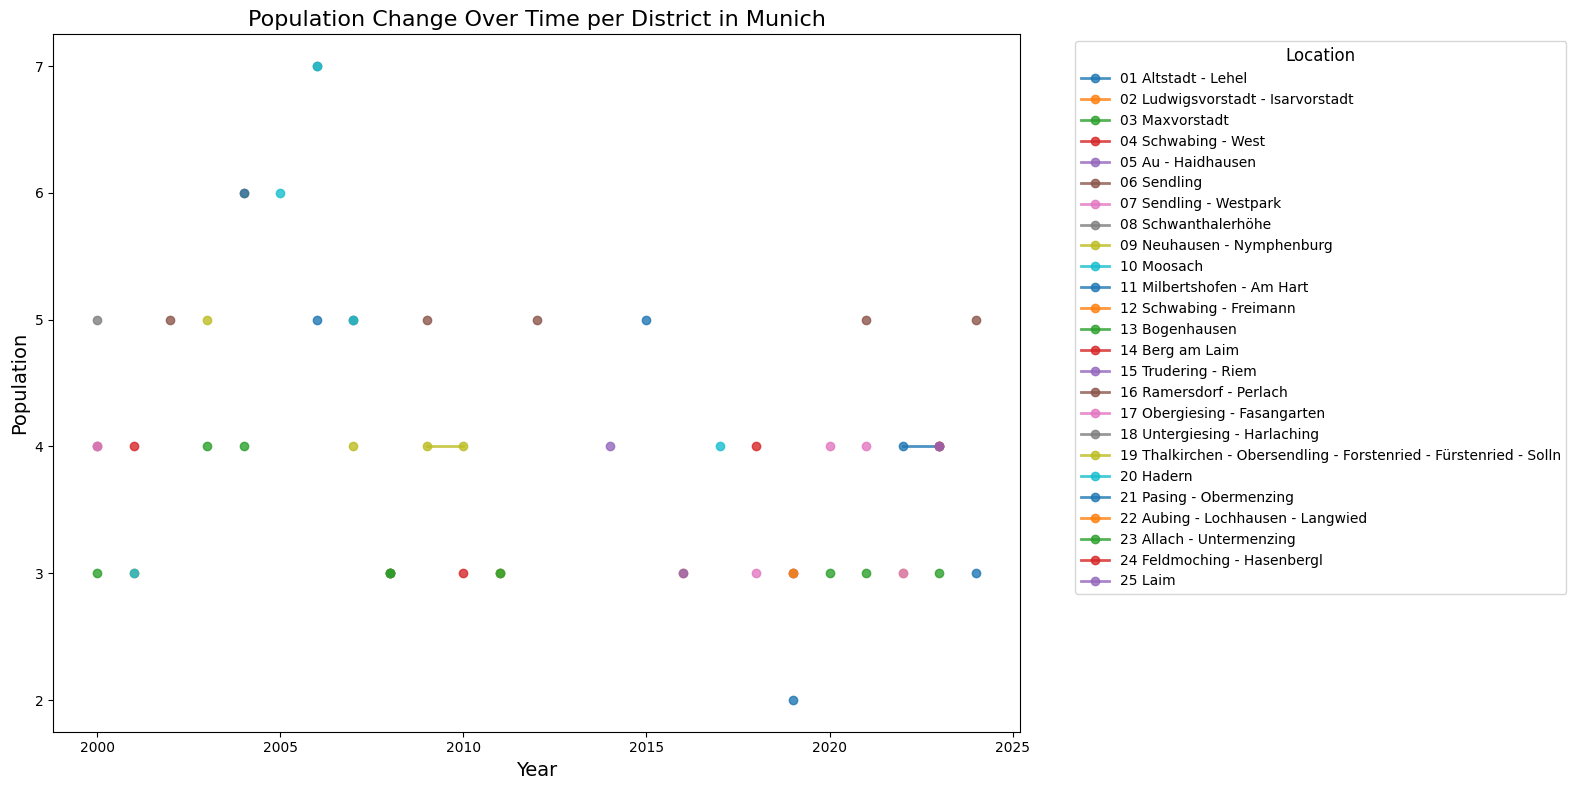

In [9]:

# Work on a copy
df = df_unemployed_total.copy()

# Ensure correct column names
df.columns = [c.strip() for c in df.columns]

# Convert columns to numeric
df["Overall Population"] = pd.to_numeric(df["Value"], errors="coerce")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Create pivot: rows = Year, columns = Location, values = Overall Population
pivot_df = df.pivot(index="Year", columns="Location", values="Overall Population")

# Choose locations to exclude from the legend (optional)
exclude = ["Stadt München"]  # example: remove the overall city line from legend

# Plot
plt.figure(figsize=(16, 8))  # Adjust figure size

for col in pivot_df.columns:
    if col not in exclude:
        plt.plot(
            pivot_df.index,
            pivot_df[col],
            label=col,
            linewidth=2,       # line thickness
            linestyle='-',     # line style
            marker='o',        # marker at each data point
            alpha=0.8          # transparency
        )

plt.ylabel("Population", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.title("Population Change Over Time per District in Munich", fontsize=16)

# Customize legend
plt.legend(
    title="Location",
    bbox_to_anchor=(1.05, 1),  # move outside to the right
    loc="upper left",
    fontsize=10,
    title_fontsize=12
)

plt.tight_layout()  # adjust layout to fit everything
plt.show()


In [10]:
pivot_df.head()
pivot_df.isna().sum()


Location
01 Altstadt - Lehel                                                  23
02 Ludwigsvorstadt - Isarvorstadt                                    23
03 Maxvorstadt                                                       23
04 Schwabing - West                                                  23
05 Au - Haidhausen                                                   23
06 Sendling                                                          22
07 Sendling - Westpark                                               23
08 Schwanthalerhöhe                                                  22
09 Neuhausen - Nymphenburg                                           22
10 Moosach                                                           23
11 Milbertshofen - Am Hart                                           21
12 Schwabing - Freimann                                              24
13 Bogenhausen                                                       21
14 Berg am Laim                                        

In [11]:

df_unemployed_total['District'] = df_unemployed_total['Location'].str.extract(r'^(\d{2})')  # Extract the first two digits

# Handle rows like 'Stadt München' (no digits)
df_unemployed_total['District'] = df_unemployed_total['District'].fillna('00')

# Remove the leading number and dash from Location text
df_unemployed_total['Location'] = df_unemployed_total['Location'].str.replace(r'^\d{2}\s*-\s*', '', regex=True)
df_unemployed_total['Location'] = df_unemployed_total['Location'].str.replace(r'^\d{2}\s*', '', regex=True)
# (Optional) Clean up whitespace
df_unemployed_total['Location'] = df_unemployed_total['Location'].str.strip()

print(df_unemployed_total.head(10))

   Year                        Location Value District
0  2024                   Stadt München   3,9       00
1  2024                Altstadt - Lehel     3       01
2  2024  Ludwigsvorstadt - Isarvorstadt   3,5       02
3  2024                     Maxvorstadt   3,2       03
4  2024                Schwabing - West   2,9       04
5  2024                 Au - Haidhausen   3,6       05
6  2024                        Sendling   4,1       06
7  2024             Sendling - Westpark   3,9       07
8  2024                Schwanthalerhöhe   4,4       08
9  2024         Neuhausen - Nymphenburg   3,3       09


In [12]:
df_unemployed_total.to_csv("cleaned_districts_unemployment.csv", index=False, encoding='utf-8')

In [15]:
df_unemployed_total[df_unemployed_total["District"] == "24"]


,Year,Location,Value,District
24,2024,Feldmoching - Hasenbergl,"4,5",24
50,2023,Feldmoching - Hasenbergl,4,24
76,2022,Feldmoching - Hasenbergl,"3,9",24
102,2021,Feldmoching - Hasenbergl,"4,5",24
128,2020,Feldmoching - Hasenbergl,"4,5",24
154,2019,Feldmoching - Hasenbergl,"3,3",24
180,2018,Feldmoching - Hasenbergl,"3,6",24
206,2017,Feldmoching - Hasenbergl,"4,1",24
232,2016,Feldmoching - Hasenbergl,"4,5",24
258,2015,Feldmoching - Hasenbergl,"4,7",24


Erwerbsfähige

In [5]:
df_unemployed_total = unemployment_df[(unemployment_df['Indikator'] == 'Erwerbsfähige') & (unemployment_df['Ausprägung'] == 'insgesamt')]

In [6]:
df_unemployed_total

,Indikator,Ausprägung,Jahr,Raumbezug,Indikatorwert,Basiswert 1,Basiswert 2,Name Basiswert 1,Name Basiswert 2
8450,Erwerbsfähige,insgesamt,2024,Stadt München,"69,9",1116178.2,1595787.8,Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...,Hauptwohnsitzbevölkerung (insgesamt)
8451,Erwerbsfähige,insgesamt,2024,01 Altstadt - Lehel,"73,8",15366.4,20819.3,Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...,Hauptwohnsitzbevölkerung (insgesamt)
8452,Erwerbsfähige,insgesamt,2024,02 Ludwigsvorstadt - Isarvorstadt,"78,2",39042.8,49928.4,Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...,Hauptwohnsitzbevölkerung (insgesamt)
8453,Erwerbsfähige,insgesamt,2024,03 Maxvorstadt,"79,2",41328.8,52213.5,Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...,Hauptwohnsitzbevölkerung (insgesamt)
8454,Erwerbsfähige,insgesamt,2024,04 Schwabing - West,"72,7",49638.1,68301.5,Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...,Hauptwohnsitzbevölkerung (insgesamt)
...,...,...,...,...,...,...,...,...,...
9095,Erwerbsfähige,insgesamt,2000,21 Pasing - Obermenzing,"69,8",41411.5,59320.4,Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...,Hauptwohnsitzbevölkerung (insgesamt)
9096,Erwerbsfähige,insgesamt,2000,22 Aubing - Lochhausen - Langwied,"68,5",25492.7,37214.9,Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...,Hauptwohnsitzbevölkerung (insgesamt)
9097,Erwerbsfähige,insgesamt,2000,23 Allach - Untermenzing,"68,2",18208.8,26681.8,Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...,Hauptwohnsitzbevölkerung (insgesamt)
9098,Erwerbsfähige,insgesamt,2000,24 Feldmoching - Hasenbergl,"67,6",34980.3,51771.4,Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (in...,Hauptwohnsitzbevölkerung (insgesamt)


In [7]:
df_unemployed_total = df_unemployed_total.drop(columns=['Indikator', 'Basiswert 1','Basiswert 2', 'Name Basiswert 1','Name Basiswert 2','Ausprägung'])
df_unemployed_total.rename(columns={'Indikatorwert': 'Value', "Raumbezug": "Location" , "Jahr": "Year"}, inplace=True)
df_unemployed_total = df_unemployed_total.reset_index(drop=True)
df_unemployed_total['Year'] = df_unemployed_total['Year'].astype(int)

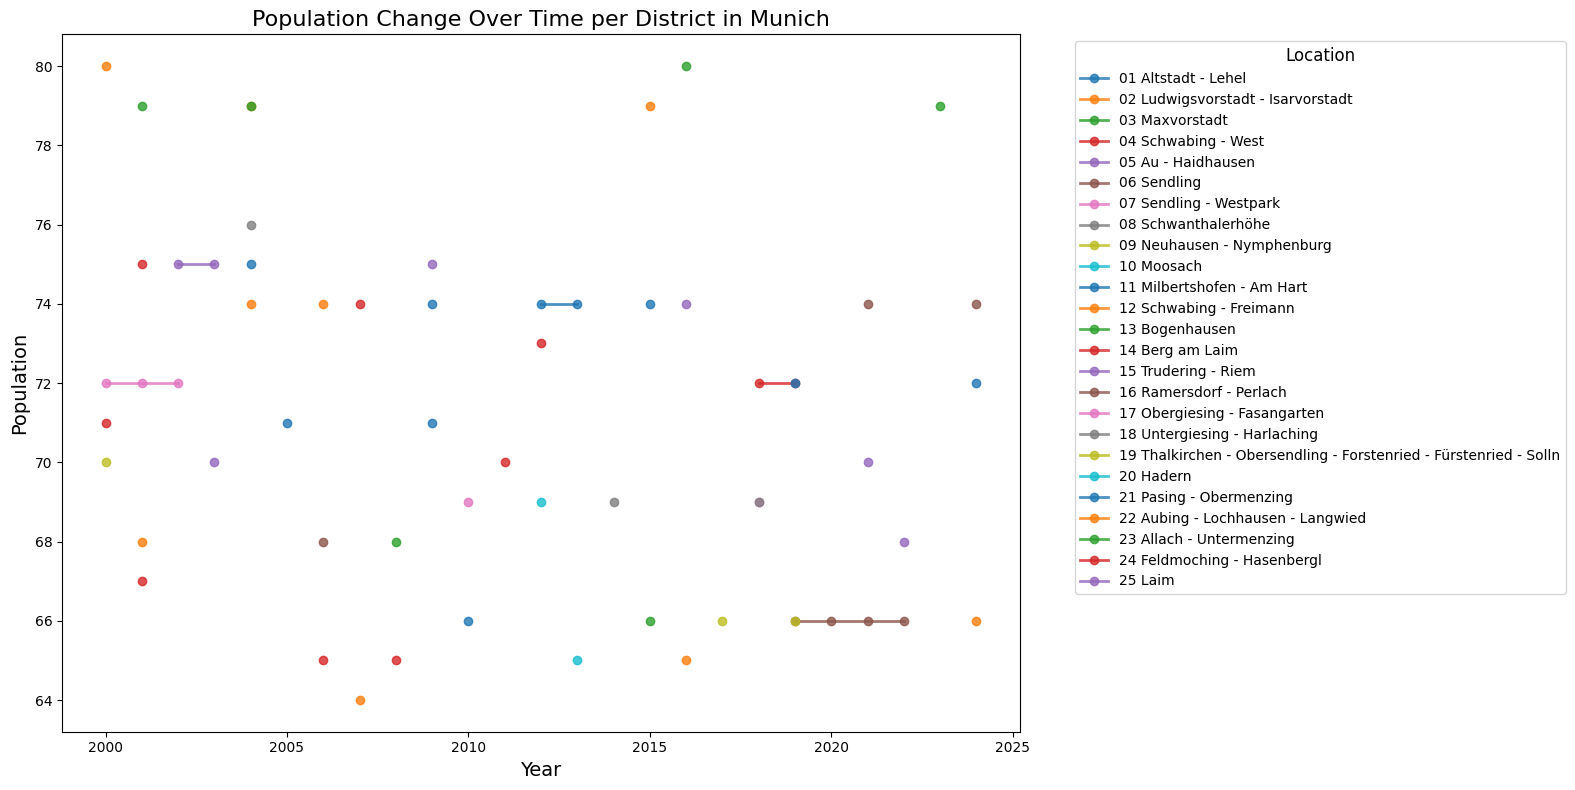

In [9]:

# Work on a copy
df = df_unemployed_total.copy()

# Ensure correct column names
df.columns = [c.strip() for c in df.columns]

# Convert columns to numeric
df["Overall Population"] = pd.to_numeric(df["Value"], errors="coerce")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Create pivot: rows = Year, columns = Location, values = Overall Population
pivot_df = df.pivot(index="Year", columns="Location", values="Overall Population")

# Choose locations to exclude from the legend (optional)
exclude = ["Stadt München"]  # example: remove the overall city line from legend

# Plot
plt.figure(figsize=(16, 8))  # Adjust figure size

for col in pivot_df.columns:
    if col not in exclude:
        plt.plot(
            pivot_df.index,
            pivot_df[col],
            label=col,
            linewidth=2,       # line thickness
            linestyle='-',     # line style
            marker='o',        # marker at each data point
            alpha=0.8          # transparency
        )

plt.ylabel("Population", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.title("Population Change Over Time per District in Munich", fontsize=16)

# Customize legend
plt.legend(
    title="Location",
    bbox_to_anchor=(1.05, 1),  # move outside to the right
    loc="upper left",
    fontsize=10,
    title_fontsize=12
)

plt.tight_layout()  # adjust layout to fit everything
plt.show()


In [10]:
pivot_df.head()
pivot_df.isna().sum()


Location
01 Altstadt - Lehel                                                  20
02 Ludwigsvorstadt - Isarvorstadt                                    22
03 Maxvorstadt                                                       21
04 Schwabing - West                                                  20
05 Au - Haidhausen                                                   21
06 Sendling                                                          23
07 Sendling - Westpark                                               23
08 Schwanthalerhöhe                                                  24
09 Neuhausen - Nymphenburg                                           25
10 Moosach                                                           24
11 Milbertshofen - Am Hart                                           21
12 Schwabing - Freimann                                              23
13 Bogenhausen                                                       24
14 Berg am Laim                                        

In [11]:

df_unemployed_total['District'] = df_unemployed_total['Location'].str.extract(r'^(\d{2})')  # Extract the first two digits

# Handle rows like 'Stadt München' (no digits)
df_unemployed_total['District'] = df_unemployed_total['District'].fillna('00')

# Remove the leading number and dash from Location text
df_unemployed_total['Location'] = df_unemployed_total['Location'].str.replace(r'^\d{2}\s*-\s*', '', regex=True)
df_unemployed_total['Location'] = df_unemployed_total['Location'].str.replace(r'^\d{2}\s*', '', regex=True)
# (Optional) Clean up whitespace
df_unemployed_total['Location'] = df_unemployed_total['Location'].str.strip()

print(df_unemployed_total.head(10))

   Year                        Location Value District
0  2024                   Stadt München  69,9       00
1  2024                Altstadt - Lehel  73,8       01
2  2024  Ludwigsvorstadt - Isarvorstadt  78,2       02
3  2024                     Maxvorstadt  79,2       03
4  2024                Schwabing - West  72,7       04
5  2024                 Au - Haidhausen  73,5       05
6  2024                        Sendling    74       06
7  2024             Sendling - Westpark  69,8       07
8  2024                Schwanthalerhöhe  76,1       08
9  2024         Neuhausen - Nymphenburg  70,5       09


In [12]:
df_unemployed_total.to_csv("cleaned_districts_able_to_work.csv", index=False, encoding='utf-8')